In [ ]:
import pandas as pd
from collections import Counter
import re                                         # Importing important libraries
import plotly.io as pio
pio.templates.default = "plotly_white"

df = pd.read_csv('Queries.csv')


# **Q-1**

# Check Dataset information, check null values, check the descriptive statistics of the Dataset

In [ ]:
df.info()                        # Checking column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [ ]:
print(df.isnull().sum())              # checking null values

Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64


# There is not any null value in the Dataset

In [ ]:
df.describe()                     # checking the descriptive statistics of the Dataset

,Clicks,Impressions,Position
count,1000.0000,1000.000000,1000.000000
mean,172.2750,1939.466000,3.985930
std,281.0221,4856.702605,2.841842
min,48.0000,62.000000,1.000000
25%,64.0000,311.000000,2.010000
50%,94.0000,590.500000,3.120000
75%,169.0000,1582.750000,5.342500
max,5223.0000,73380.000000,28.520000


# **Q-2**

# Convert 'CTR' column from percentage string to float

In [ ]:
df['CTR']                          # its in percentage form

0      35.83%
1      81.28%
2       2.83%
3      40.57%
4      76.38%
        ...  
995    13.01%
996    14.37%
997    16.27%
998    19.75%
999    28.92%
Name: CTR, Length: 1000, dtype: object

In [ ]:
# making a function to convert CTR from percentage to float
def percentage_to_float(percentage_str):
    return float(percentage_str.strip('%')) / 100

df['CTR'] = df['CTR'].apply(percentage_to_float)

print(df['CTR'])

0      0.3583
1      0.8128
2      0.0283
3      0.4057
4      0.7638
        ...  
995    0.1301
996    0.1437
997    0.1627
998    0.1975
999    0.2892
Name: CTR, Length: 1000, dtype: float64


# **Q-3**

# Analyze common words in each search query

# 1) Creat a function to clean and split the queries into words

In [ ]:
df = pd.read_csv('Queries.csv')

# making a fuction to split queries into words

def clean_and_split_query(query):
  query = query.lower()
  # removing eampty spaces, alphanumeric chracters and underscores
  query = re.sub(r'[^\w\s]', '', query)
  # spliting into words()
  words = query.split()
  return words
df['Top queries'] = df['Top queries'].apply(clean_and_split_query)
print(df['Top queries'])

0                     [number, guessing, game, python]
1                                [thecleverprogrammer]
2               [python, projects, with, source, code]
3      [classification, report, in, machine, learning]
4                            [the, clever, programmer]
                            ...                       
995       [human, activity, recognition, python, code]
996                   [python, contact, book, project]
997                  [why, standard, scaler, is, used]
998       [credit, scoring, machine, learning, python]
999                         [numpy, useful, functions]
Name: Top queries, Length: 1000, dtype: object


# 2) Split each querry into words and count the frequency of the word

In [ ]:
# looping for each word in the 'Top queries
all_words = [word for sublist in df['Top queries'] for word in sublist]
# finding frequency
word_counts = Counter(all_words)
# converts 'word_counts' to a DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frequency'])
# Sort the DataFrame by frequency in Descendning order
word_counts_df = word_counts_df.sort_values(by='Frequency',ascending=False)
print(word_counts_df)

           Frequency
python           562
in               232
code             138
learning         133
machine          123
...              ...
sql                1
single             1
implement          1
birth              1
useful             1

[613 rows x 1 columns]


# 3) Plot the word frequencies.

In [ ]:
import plotly.express as px
# ploting word frequency chart
fig = px.bar(word_counts_df, x=word_counts_df.index, y='Frequency',
             title='Word Frequency',
             labels={'Frequency': 'Frequency', 'x': 'Word'})
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

# **Q-4**

# look at the top queries by clicks and impressions

In [ ]:
df = pd.read_csv('Queries.csv')
#  Top queries by Clicks
top_queries_by_clicks = df.sort_values(by='Clicks',ascending=False).head(10)
#  Top queries by Impressions
top_queries_by_impressions = df.sort_values(by='Impressions',ascending=False).head(10)
#  making a plot of Top queries by Clicks
fig_clicks = px.bar(top_queries_by_clicks, x='Top queries',y='Clicks',
                    title ='Top queries by Clicks',
                    labels = {'Clicks':'Clicks','Top queries':'Top queries'})
#  making a plot of Top queries by Impressions
fig_impressions = px.bar(top_queries_by_impressions, x='Top queries',y='Impressions',
                         title ='Top queries by Impressions',
                         labels = {'Impressions':'Impressions','Top queries':'Top queries'})
fig_clicks.show()
fig_impressions.show()

# **Q-5**

# Analyze the queries with the highest and lowest CTRs

In [ ]:
# Queries with highest CTR
highest_CTR = df.sort_values(by="CTR",ascending=False).head(10)
# Queries with lowest CTR
lowest_CTR = df.sort_values(by='CTR',ascending=True).head(10)
# making plot of Queries with highest CTR
fig_hi_CTR = px.bar(highest_CTR,x = 'Top queries', y = 'CTR',
                    title = 'Queries with highest CTR',
                    labels = {'Top queries':'Top queries','CTR':'CTR'})
# making plot of Queries with lowest CTR
fig_lo_CTR = px.bar(lowest_CTR,x = 'Top queries', y = 'CTR',
                    title = 'Queries with lowest CTR',
                    labels = {'Top queries':'Top queries','CTR':'CTR'})
fig_hi_CTR.show()
fig_lo_CTR.show()


# **Q-6**

# Correlation between different metrics

<function matplotlib.pyplot.show(close=None, block=None)>

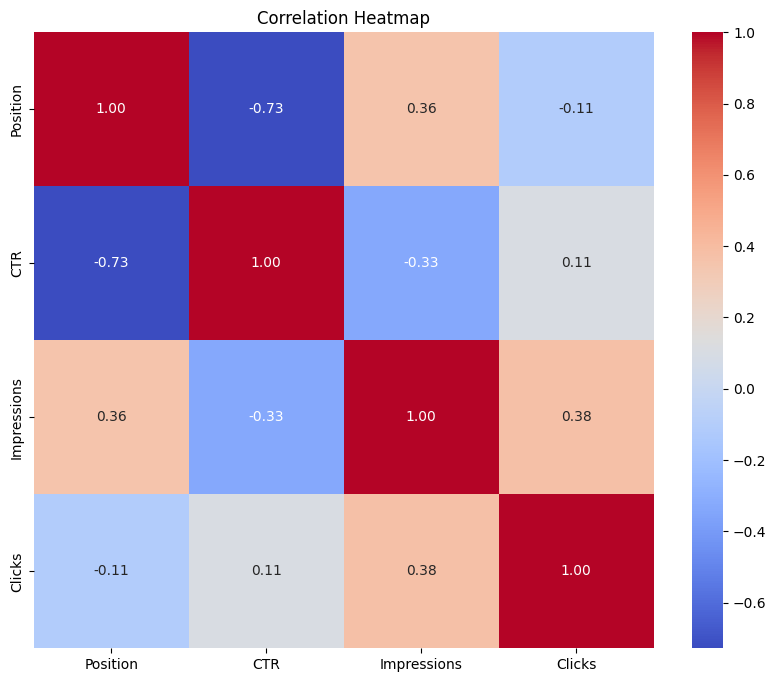

In [ ]:
# converting CTR from percentage to float
df['CTR'] = df['CTR'].apply(percentage_to_float)

import matplotlib.pyplot as plt
import seaborn as sns
# declaring columns as dataframe
ndf = pd.DataFrame(df,columns=['Position','CTR','Impressions','Clicks'])
correlation_matrix = ndf.corr()
# ploting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show

observation from the correlation matrix

# **Q-7**

# Detect anomalies in search queries using isolation forest algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
df = pd.read_csv('Queries.csv')

df['CTR'] = df['CTR'].apply(percentage_to_float)
columns = ['CTR','Clicks','Impressions']
data = df[columns]
# making a model to find anomalies
model = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0)
# fitting values in model
model.fit(data)
# predicting values of model
predictions = model.predict(data)
predictions

In [ ]:
# finding the index of anomalies
index = np.where(predictions < 0)
index

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  57,  59,  62,  66,  70,  71,  72,  73,  77,
         79,  80,  82,  83,  91,  95,  96,  99, 104, 105, 108, 116, 120,
        121, 125, 127, 137, 145, 157, 167, 176, 177, 180, 203, 232, 307,
        352, 388, 423, 491, 509, 536, 544, 625, 664, 683, 684, 732, 771,
        858, 926, 927, 928, 929, 944, 963, 964, 981]),)

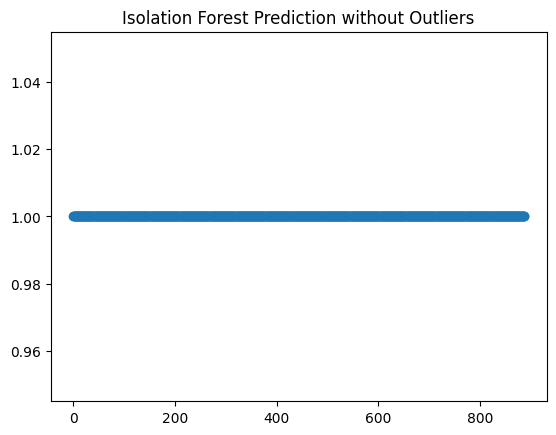

In [ ]:
# deleting anomalies in the dataset
predictions_without_outliers = np.delete(predictions, index)

# ploting Isolation Forest Prediction without anomalies
plt.scatter(range(len(predictions_without_outliers)), predictions_without_outliers)
plt.xlabel = ['Index']
plt.ylabel = ['Isolation Forest Prediction']
plt.title('Isolation Forest Prediction without Outliers')
plt.show()

In [ ]:
# showing the results
df

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09
...,...,...,...,...,...
995,human activity recognition python code,48,369,0.1301,6.53
996,python contact book project,48,334,0.1437,4.92
997,why standard scaler is used,48,295,0.1627,2.07
998,credit scoring machine learning python,48,243,0.1975,6.40
